## Histogram-based image enhancement

In [104]:
# Required Modules
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity, cumulative_distribution
from skimage import data, img_as_float
import numpy as np

### <span style=color:green> histogram Stretching or Shrinking and Equalization </span>

1.0, 133.0


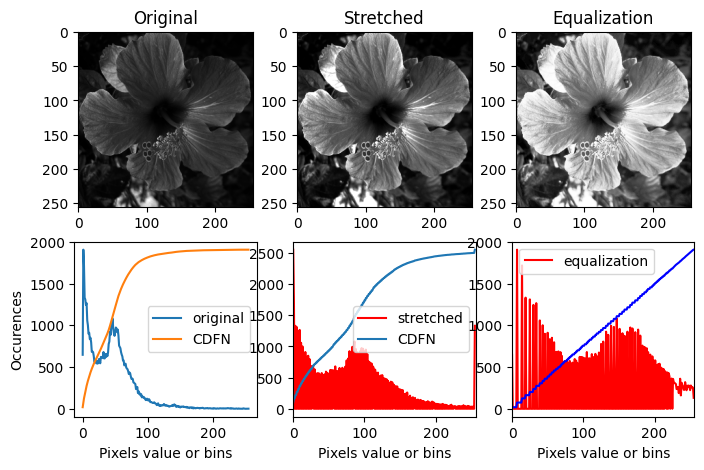

In [105]:
# Read the plant image
plant = cv2.imread("Images/plant.png", cv2.IMREAD_GRAYSCALE)

# Contrast stretching
p2, p98 = np.percentile(plant, (2, 98))
print(f"{p2}, {p98}")
plant_rescale = rescale_intensity(plant, in_range=(p2, p98))

# Equalization
plant_eq = cv2.equalizeHist(plant)  # We can also use skimage here

# Computing histogram
channels = [0]    # Image channel where to compute
mask = None       # Else compute the part of image selected
histSize = [256]  # Channel Histogram size  or histogram quantification: 8, 16, 32, 64 ...
ranges = [0, 256] # Include pixels values from 0 to 255

plant_hist = cv2.calcHist([plant], channels, mask, histSize, ranges)
plant_rescale_hist = cv2.calcHist([plant_rescale],channels=[0], mask=None, histSize=[256], ranges=[0,256])
plant_eq_hist = cv2.calcHist([plant_eq],channels=[0], mask=None, histSize=[256], ranges=[0,256])


# Calculate the cumulative distribution function (CDF) and Normalize
plant_cdf = plant_hist.cumsum()
plant_cdf_norm = plant_cdf * np.float64(plant_hist.max()) / plant_cdf.max()
#plant_cdf_norm = cv2.normalize(plant_cdf, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#print(plant_cdf_norm)

plant_rescale_cdf = plant_rescale_hist.cumsum()
plant_rescale_norm = plant_rescale_cdf * np.float64(plant_rescale_hist.max()) / plant_rescale_cdf.max()
#plant_rescale_norm = cv2.normalize(plant_rescale_cdf, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plant_eq_hist_cdf = plant_eq_hist.cumsum()
plant_eq_normalized = plant_eq_hist_cdf * np.float64(plant_eq_hist.max()) / plant_eq_hist_cdf.max()

# Ploting Results
plt.figure(figsize=[8,5])
plt.subplot(231); plt.imshow(plant, cmap="gray"); plt.title("Original")
plt.subplot(232); plt.imshow(plant_rescale, cmap="gray"); plt.title("Stretched")
plt.subplot(233); plt.imshow(plant_eq, cmap="gray"); plt.title("Equalization")
plt.subplot(234); plt.plot(plant_hist, label="original"); plt.plot(plant_cdf_norm, label='CDFN'); plt.xlabel('Pixels value or bins'); plt.ylabel('Occurences'); plt.legend()   # Add plt.savefig() to save in current folder
plt.subplot(235); plt.plot(plant_rescale_hist, label="stretched", color='r'); plt.plot(plant_rescale_norm,label='CDFN'); plt.xlim([0, 256]); plt.xlabel('Pixels value or bins'); plt.legend();  
plt.subplot(236); plt.plot(plant_eq_hist, label="equalization", color='r'); plt.plot(plant_eq_normalized, color='b'); plt.xlim([0, 256]); plt.xlabel('Pixels value or bins'); plt.legend()
plt.show()

### <span style=color:green> RGB histogram </span>

2D Histogram BG shape: (32, 32), with 1024 values 


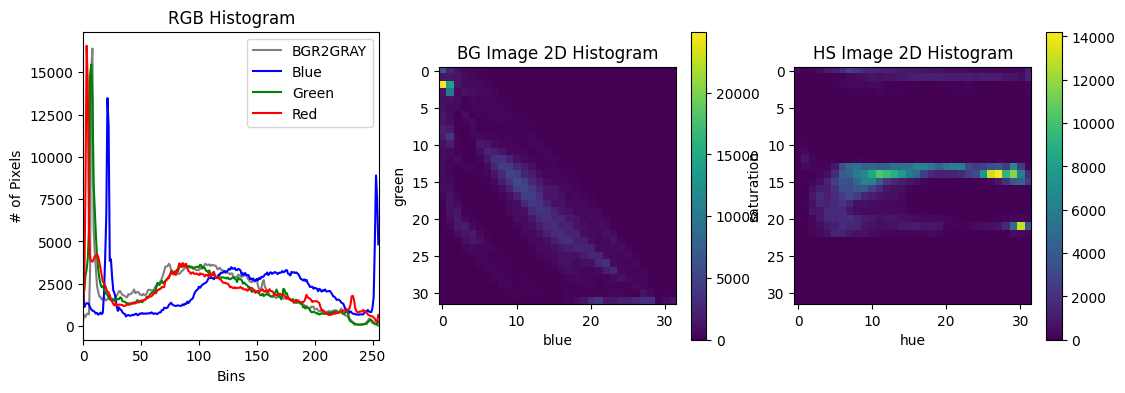

In [106]:
# Read messi image
messi_bgr = cv2.imread("Images/messi.jpg", cv2.IMREAD_COLOR)
messi_gray = cv2.cvtColor(messi_bgr, cv2.COLOR_BGR2GRAY)
messi_hsv = cv2.cvtColor(messi_bgr, cv2.COLOR_BGR2HSV)

# Compute messi histogram
# We can't plot a 3D histogram
messi_hist2D_bg = cv2.calcHist([messi_bgr], [0,1], None, [32, 32], [0, 256, 0, 256])
messi_gray_hist = cv2.calcHist([messi_gray], [0], None, [256], [0, 256])
messi_hist2D_hs = cv2.calcHist([messi_hsv], [0,1], None, [32, 32], [0, 256, 0, 256])

# Print the Shape of BG histogram
print(f"2D Histogram BG shape: {messi_hist2D_bg.shape}, with {messi_hist2D_bg.flatten().shape[0]} values ")

# Splitting Channels
chans: tuple = cv2.split(messi_bgr) # Extracting every single channel b, g, r
# Define colors and labels for plotting
colors: list[str] = ['b', 'g', 'r']
labels: list[str] = ["Blue", "Green", "Red"]


# Set the figure for plotting
plt.figure(figsize=[13,4])
plt.subplot(131)
plt.title("RGB Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(messi_gray_hist, label="BGR2GRAY", color='gray')

# Loop over the images channels and colors
for (chan, color, label) in zip (chans, colors, labels):
    # Compute current channel histogram and plot it
    chan_hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(chan_hist, color=color, label=label)
    plt.xlim([0, 256])
plt.legend()
plt.subplot(132); plt.imshow(messi_hist2D_bg); plt.title("BG Image 2D Histogram"); plt.xlabel("blue"); plt.ylabel("green"); plt.colorbar(plt.imshow(messi_hist2D_bg))
plt.subplot(133); plt.imshow(messi_hist2D_hs); plt.title("HS Image 2D Histogram"); plt.xlabel("hue"); plt.ylabel("saturation"); plt.colorbar(plt.imshow(messi_hist2D_hs))
plt.show()